# JDDEV 2017: Python and Dataviz

By [Romain Vuillemot](http://romain.vuillemot.net/)

*This document is the notebook I presented during a workshop at [JDDEV 2017](devlog.cnrs.fr/jdev2017/t7). It is written in English in order to reach a broader audience, while the talk was in French. I give credits at the end of the notebook as it is largely inpired by other works I found publicly available on the web.*

The workshop is **40min long**, and is organized as follows:

* **Quick introduction (5min):** who am I? 
* **Why use visualization (5min):** what is dataviz? why is it important? why doing it in Python?
* **Data exploration using ggplot (10min):**  
* **Roundup of current Python and Dataviz (10min):** which are the main libraries? what is the overall programming phylosophy? what are the alternatives?
* **Perspectives (10min):** Python and JavaScript, Web services

Hope after this workshop you'll be able to:

* Understand basic visulization principles
* Pick up the right visualization tool based on your need
* Have a structured process to visually explore data
* Be able to deploy and share your visualizations


Resources

* Iteration over a previous notebook I made for MixIT 2016

## Who am I?

* Assistant Professor at École Centrale de Lyon
* Teaching Python and research in Data Visualization

> I am a researcher crafting **novel visual tools**, to support humans in solving real-world, data-intensive problems. This research is at the intersection of the academic fields of Information Visualization, Human-Computer Interaction and Design. My outputs are publications, prototypes, and toolkits available online and their code open-source. I am also interested in the combination of art, design, and visualization, to explore untapped design spaces.

Research domains	

* Information Visualization
* Human-Computer Interaction
* Rapid prototyping
* Art and Design

Application domains

* Sports data
* Geo-Spatial data
* Trajectories data
* Parameters spaces


### Learn more

* My research articles and projects http://romain.vuillemot.net/




## Exploratory Data Analysis

* [Python Plotting for Exploratory Data Analysis](http://pythonplot.com/)
* [Data analysts actually spend huge amount of time cleaning up data](http://vis.stanford.edu/files/2012-EnterpriseAnalysisInterviews-VAST.pdf)

Simple questions to ask before (won't be adressed in this workshop!)

- Where does the dataset come from?
- Is the dataset complete?
- Do you need format/reference metadata?

-Clean the data
-Complete missing time point
-Join with metadata


### Interesting datasets

* Random data!
* Samples
* Default datasets in libs
* Connectors (e.g. [google analytics](https://read.dataly.co/google-analytics-api-how-to-get-data-from-google-analytics-with-python-in-jupyter-notebook-with-85483dd73e22))


## Why visualize?

First, let's load a simple dataset called the *Anscombes Quartet*, which has been manually created to show some interesting statistical properties.

In [165]:
import pandas as pd
anscombe = pd.read_csv('data/anscombes_quartet.csv', header=[0,1], index_col=[0])
anscombe

group     I           II         III           IV       
var       x      y     x     y     x      y     x      y
0      10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
1       8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
2      13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
3       9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
4      11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
5      14.0   9.96  14.0  8.10  14.0   8.84   8.0   7.04
6       6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
7       4.0   4.26   4.0  3.10   4.0   5.39  19.0  12.50
8      12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
9       7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
10      5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

A few key observations:

* We have 4 different datasets (I, II, III, IV) with 2 dimensions (x, y)
* Each dimension has quantitative values
* What are their statistical properties?

In [166]:
anscombe.mean()

group  var
I      x      9.000000
       y      7.500909
II     x      9.000000
       y      7.500909
III    x      9.000000
       y      7.500000
IV     x      9.000000
       y      7.500909
dtype: float64

In [167]:
anscombe.var()

group  var
I      x      11.000000
       y       4.127269
II     x      11.000000
       y       4.127629
III    x      11.000000
       y       4.122620
IV     x      11.000000
       y       4.123249
dtype: float64

Summary

* With Pandas, one can already assess that it has shared properties accross datasets 
* More properties can be explored

| Property	            | Value                |
|-----------------------|----------------------|
| Mean of x             |	9                  |
| Sample variance of x  |	11                 |
| Mean of y             |	7.50               |
| Sample variance of y  |   4.122              |
| Correlation           |   0.816              |
| Linear regression line|   y = 3.00 + 0.500x  |

### Learn more

* How to generate such hand-made dataset
* [Basic statistics in pandas DataFrame](https://medium.com/@kasiarachuta/basic-statistics-in-pandas-dataframe-594208074f85)

* ["Same Stats, Different Graphs: Generating Datasets with Varied Appearance and Identical Statistics through Simulated Annealing"](https://www.autodeskresearch.com/publications/samestats) Justin Matejka, George Fitzmaurice. CHI 2017.

<img src="img/DinoSequential.gif" style="width: 400px;">


## Why visualize?

* Descriptive statistics are useufl but are not enough during data exploration phase
* Humans have an **important visual bandwidth* and can immediately understand the data distribution, missing data, outliers, ..


### Data pre-processing

* This is actually one of the most important step
* Even if clean, need for data massaging


In [168]:
melted = pd.melt(anscombe) # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html
melted['index'] = list(range(int(len(melted)/8)))*8
melted[:8]

,group,var,value,index
0,I,x,10.0,0
1,I,x,8.0,1
2,I,x,13.0,2
3,I,x,9.0,3
4,I,x,11.0,4
5,I,x,14.0,5
6,I,x,6.0,6
7,I,x,4.0,7


In [169]:
df = melted.set_index(['group','index', 'var']).unstack()
df.columns = [col[1].strip() for col in df.columns.values]
df[7:15]

x      y
group index             
I     7       4.0   4.26
      8      12.0  10.84
      9       7.0   4.82
      10      5.0   5.68
II    0      10.0   9.14
      1       8.0   8.14
      2      13.0   8.74
      3       9.0   8.77

In [170]:
df.reset_index(inplace=True)
df[7:15]

,group,index,x,y
7,I,7,4.0,4.26
8,I,8,12.0,10.84
9,I,9,7.0,4.82
10,I,10,5.0,5.68
11,II,0,10.0,9.14
12,II,1,8.0,8.14
13,II,2,13.0,8.74
14,II,3,9.0,8.77


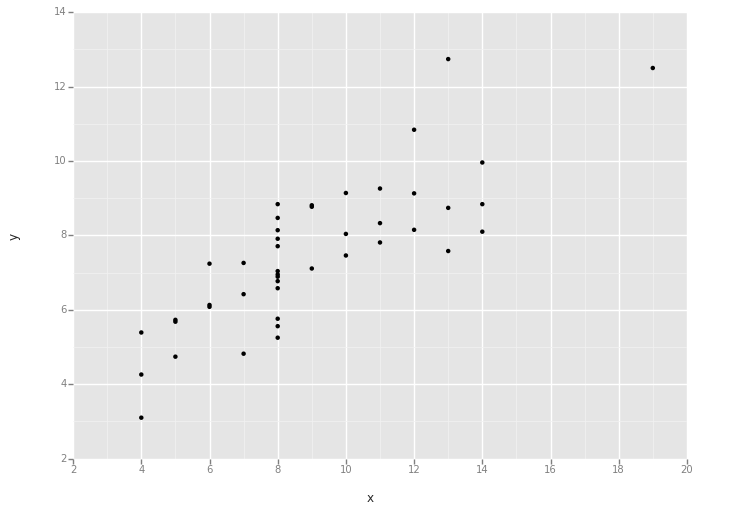

<ggplot: (291750369)>

In [171]:
from ggplot import *
%matplotlib inline
ggplot(aes(x='x', y='y'), data=df)+geom_point()

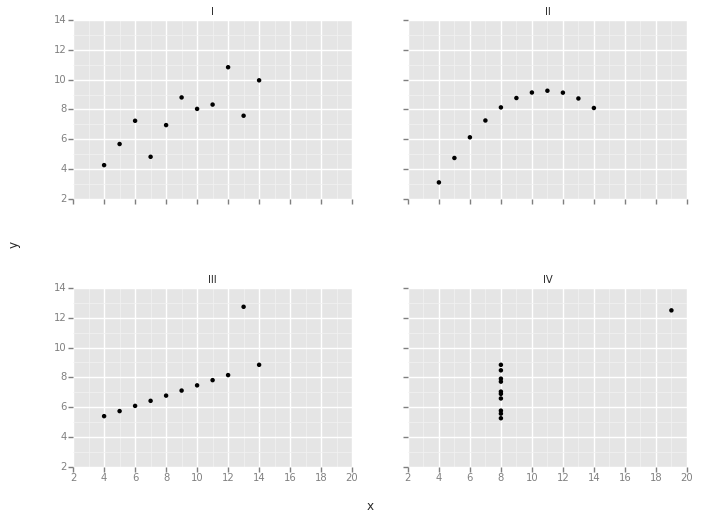

<ggplot: (-9223372036562932280)>

In [172]:
from ggplot import *
ggplot(aes(x='x', y='y'), data=df)+facet_wrap('group',scales='relative')+geom_point() # scales='free', shape="o"

### Dataset: IRIS

* Three species of iris, total 150 flowers
* Meticulously collected by American botanist Edgar Anderson  in the early 1930s
* "Classic" [dataset](https://en.wikipedia.org/wiki/Data_set#Classic_datasets)
* More information on this dataset https://en.wikipedia.org/wiki/Iris_flower_data_set
* Browse [Google image](https://www.google.fr/search?site=&tbm=isch&source=hp&biw=1160&bih=885&q=iris+dataset&oq=iris+dataset&gs_l=img.3..0j0i24l9.2204.4044.0.4181.12.10.0.2.2.0.140.801.8j2.10.0....0...1ac.1.64.img..0.12.801.lHBOCGBUmg4) as source of inspiration/examples
* List of [+200 publications](http://archive.ics.uci.edu/ml/datasets/Iris) using this dataset
* [Many](https://gist.github.com/jobliz/2903500) ways to plot it


The data dimensions are as follows:

* 4 attributes
 * sepal length in cm
 * sepal width in cm
 * petal length in cm
 * petal width in cm

* 3 classes:
 * Iris Setosa
 * Iris Versicolour
 * Iris Virginica

* Very popular can be loaded from main libraries (e.g. [Scikit](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html))

<a href='http://blog.kaggle.com/2015/04/22/scikit-learn-video-3-machine-learning-first-steps-with-the-iris-dataset/'>
    <img src='img/iris_petal_sepal.png' style='height: 500px'>
</a>



In [173]:
import pandas as pd
df = pd.read_json("data/iris.json")
df[:5]

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa


In [174]:
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()

In [175]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [176]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [177]:
import seaborn as sns
iris_s = sns.load_dataset("iris")
iris_s

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### Before Visualization: generate pretty tables!

In [178]:
# Generate a pretty table
from ipy_table import *
import numpy as np

table = df.head().as_matrix()

header = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']

# df.rename(columns=lambda x: x[1:], inplace=True)
table_with_header = np.concatenate(([header], table))

# Basic themes
# Detais http://nbviewer.ipython.org/github/epmoyer/ipy_table/blob/master/ipy_table-Introduction.ipynb
make_table(table_with_header)
apply_theme('basic')
# Only show the top-10
set_row_style(1, color='yellow')

Sepal length,Sepal width,Petal length,Petal width,Species
1.4,0.2,5.1,3.5,setosa
1.4,0.2,4.9,3.0,setosa
1.3,0.2,4.7,3.2,setosa
1.5,0.2,4.6,3.1,setosa
1.4,0.2,5.0,3.6,setosa


## Visualization Tools in Panda

* [✔] ggplot
* [&nbsp;&nbsp;&nbsp;] matplotlib
* [&nbsp;&nbsp;&nbsp;] Pandas visualization
* [&nbsp;&nbsp;&nbsp;] Seaborn
* [&nbsp;&nbsp;&nbsp;] Bokeh
* [&nbsp;&nbsp;&nbsp;] Plotly
* [&nbsp;&nbsp;&nbsp;] Altair

<img src="img/python-landscape.png">

Great presentation at PyCon17 https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017

### Others

* Visualization tools https://github.com/fasouto/awesome-dataviz#python-tools
* Data exploration http://blog.districtdatalabs.com/data-exploration-with-python-3


Pandas plotting tools
* http://pandas.pydata.org/pandas-docs/version/0.16.0/visualization.html
* http://pandas.pydata.org/pandas-docs/version/0.16.0/cookbook.html#cookbook-plotting
* Making matplotlib graphs look like R by default? http://stackoverflow.com/questions/14349055/making-matplotlib-graphs-look-like-r-by-default
* e.g. matplotlib.style.use('ggplot')

## ggplot

* [Grammar of graphics](http://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf) based
* Simple [example](http://ggplot.yhathq.com/how-it-works.html)
* Using R with python http://nbviewer.jupyter.org/gist/ramnathv/9334834/example.ipynb 


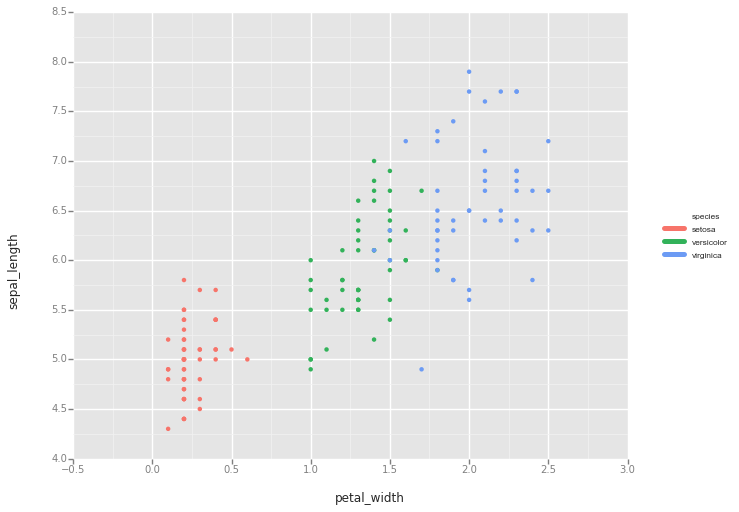

<ggplot: (-9223372036562687053)>

In [179]:
from ggplot import *
ggplot(iris_s,aes(x='petal_width', y='sepal_length', colour='species')) + \
    geom_point() # + \
    #geom_abline(intercept = 4.7776, slope = 0.88858)

### Learn more

* Properties of [geom_point](http://ggplot2.tidyverse.org/reference/geom_point.html)

## Matplotlib

* Similar to matplot plots
* Very expressive, built over a decade

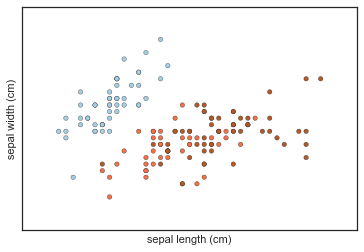

In [180]:
import matplotlib.pyplot as plt
from sklearn import datasets

#iris = datasets.load_iris()

data = iris.data[:, :2]
cat = iris.target

# Padding calculation
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5

# Plot the points
plt.scatter(data[:, 0], data[:, 1], c=cat, cmap=plt.cm.Paired)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

# Enabling padding
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Removing ticks
plt.xticks(())
plt.yticks(())

plt.show()

### Learn more

* Matplotlib API https://matplotlib.org/2.0.2/api/index.html
* Basic plots http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/matplotlib/matplotlib.ipynb
* http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
* Make a chart beautiful http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


## Pandas plot

* Built in into pandas
* Simple wrapper around plt.plot():
* Lots of advanced visualizations have been added recently

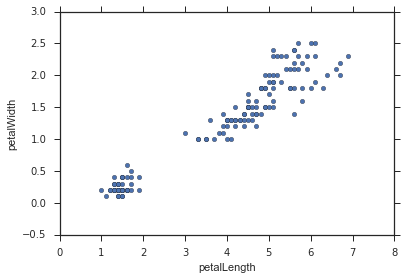

In [181]:
df.plot(kind='scatter', x='petalLength', y='petalWidth');

### Learn more

* http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot

## Seaborn

* Based on matplotlib
* Very nice themes & styles
* Nice color palettes https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html

In [182]:
import numpy as np
import pandas as pd # package for working with data frames in python
import seaborn as sns # package for visualization (more on seaborn later)


# Command line: conda install seaborn

# plots
import matplotlib.pyplot as plt
%matplotlib inline 
iris = sns.load_dataset('iris')

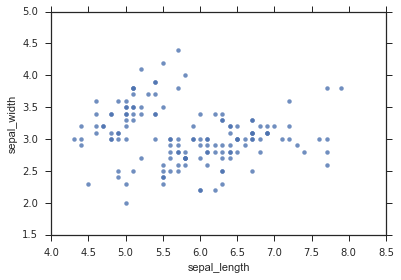

In [183]:
g = sns.regplot(x="sepal_length", y="sepal_width", data=iris, fit_reg=None)

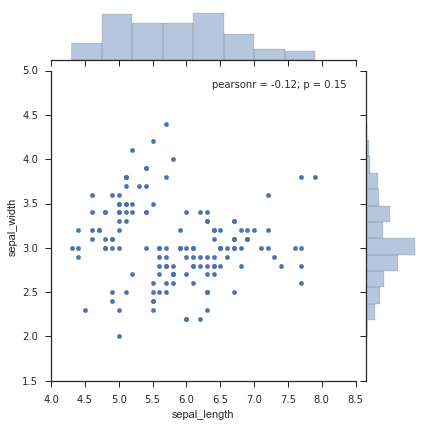

In [184]:
g = sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

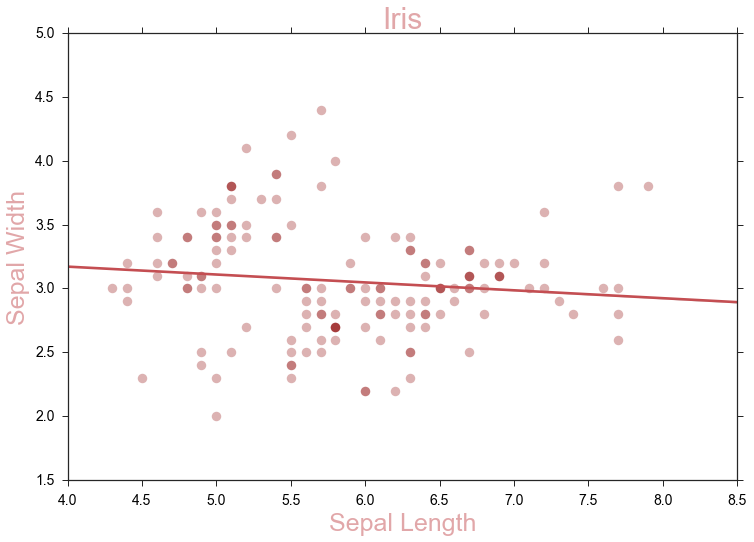

In [186]:
sns.set(style="ticks")
sns.despine() # remove the top and right line in graph

# regplot https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.regplot.html#seaborn.regplot
g = sns.regplot(x="sepal_length", y="sepal_width", color='r', data=iris, ci=False, 
    scatter_kws={"color":"darkred","alpha":0.3,"s":90}, marker= "o")

g.figure.set_size_inches(12,8)
g.axes.set_title('Iris', fontsize=30, color="r",alpha=0.5)

g.set_xlabel("Sepal Length", size = 25,color="r",alpha=0.5)
g.set_ylabel("Sepal Width" ,size = 25,color="r",alpha=0.5)
g.tick_params(labelsize=14,labelcolor="black")

### Learn more

* Seaborn API http://seaborn.pydata.org/api.html
* Gallery http://seaborn.pydata.org/examples/index.html
* http://seaborn.pydata.org/tutorial/distributions.html
* Categorical data http://seaborn.pydata.org/tutorial/categorical.html
https://web.ics.purdue.edu/~yrosokha/code/Seaborn_Example_1.html
* Iris data exploration notebook https://www.kaggle.com/benhamner/python-data-visualizations

## Bokeh

* Web-based visualization
* Has interactivity


In [189]:
from bokeh.charts import Scatter, output_notebook, show
from bokeh.io import push_notebook
from bokeh.sampledata.iris import flowers as data

scatter = Scatter(data, x='petal_length', y='petal_width',
                  color='species', marker='species',
                  title='Iris Dataset Color and Marker by Species',
                  legend=True)

output_notebook()
t = show(scatter, notebook_handle=True);

Loading BokehJS ...

### Learn more

* Iris example http://bokeh.pydata.org/en/latest/docs/gallery/iris.html
* Interaction with notebooks http://bokeh.pydata.org/en/latest/docs/user_guide/notebook.html
* Scatterplot types http://bokeh.pydata.org/en/0.11.1/docs/gallery/scatter.html

## Plotly

* Server-based
* Lots of interactivity, supported by many platforms
* 3D capabilities
* Impressive gallery of examples https://plot.ly/python/

In [190]:
import plotly.plotly as py
import plotly.graph_objs as go

from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

trace = go.Scatter(x=X[:, 0],
                   y=X[:, 1],
                   mode='markers',
                   marker=dict(color=np.random.randn(150),
                               size=10,
                               colorscale='Viridis',
                               showscale=False))

layout = go.Layout(title='Iris Dataset',
                   xaxis=dict(title='Sepal length',
                            showgrid=False),
                   yaxis=dict(title='Sepal width',
                            showgrid=False),
                  )
 
fig = go.Figure(data=[trace], layout=layout)

py.iplot(fig)

## Altair

* Nased on D3 and Vega language
* Nice gallery https://altair-viz.github.io/gallery/index.html#basic
* D3 scatterplot https://bl.ocks.org/mbostock/3887118
* Vega scatterplot https://vega.github.io/new-editor/?mode=vega-lite

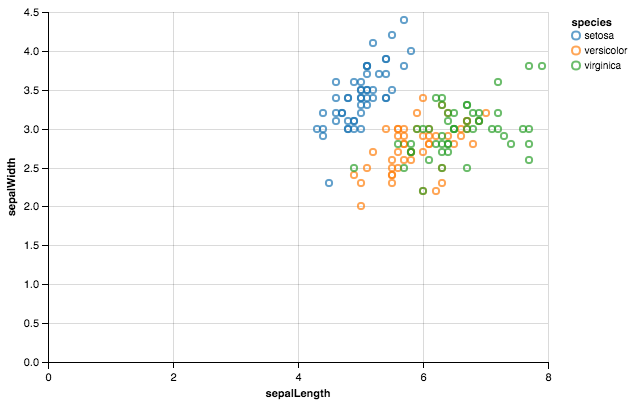

In [191]:
# https://vega.github.io/vega-datasets/data/iris.json
from altair import Chart, load_dataset
data = load_dataset('iris', url_only=True)
data
Chart(data).mark_point().encode(
    x='sepalLength:Q',
    y='sepalWidth:Q',
    color='species:N',
)

## Summary

* The visualization landscape is getting complex https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017
* All is about trade-off between expressiveness, conciceness (how many lines of code are needed?), community, gallery of examples, integration in notebooks, etc.